Import essential python library for analysis

In [1]:
import pandas as pd
import numpy as np
import glob
import matplotlib.pyplot as plt
import seaborn as sns
import os

### Load and Transform Data

Check the current directory that is containing the notebook file and the data folder containing csv files

In [2]:
os.getcwd()

'E:\\Perqara'

Return all of the csv files in the specified directory

In [3]:
all_files = glob.glob(os.path.join(os.getcwd(),'data','*.csv'))

In [4]:
all_files

['E:\\Perqara\\data\\customers_dataset.csv',
 'E:\\Perqara\\data\\geolocation_dataset.csv',
 'E:\\Perqara\\data\\orders_dataset.csv',
 'E:\\Perqara\\data\\order_items_dataset.csv',
 'E:\\Perqara\\data\\order_payments_dataset.csv',
 'E:\\Perqara\\data\\order_reviews_dataset.csv',
 'E:\\Perqara\\data\\products_dataset.csv',
 'E:\\Perqara\\data\\product_category_name_translation.csv',
 'E:\\Perqara\\data\\sellers_dataset.csv']

Read and load all of the csv files into the list of dataframes

In [5]:
list_df = []
for csv_file in all_files:
    df = pd.read_csv(csv_file)
    list_df.append(df)

In [6]:
list_df

[                            customer_id                customer_unique_id  \
 0      06b8999e2fba1a1fbc88172c00ba8bc7  861eff4711a542e4b93843c6dd7febb0   
 1      18955e83d337fd6b2def6b18a428ac77  290c77bc529b7ac935b93aa66c333dc3   
 2      4e7b3e00288586ebd08712fdd0374a03  060e732b5b29e8181a18229c7b0b2b5e   
 3      b2b6027bc5c5109e529d4dc6358b12c3  259dac757896d24d7702b9acbbff3f3c   
 4      4f2d8ab171c80ec8364f7c12e35b23ad  345ecd01c38d18a9036ed96c73b8d066   
 ...                                 ...                               ...   
 99436  17ddf5dd5d51696bb3d7c6291687be6f  1a29b476fee25c95fbafc67c5ac95cf8   
 99437  e7b71a9017aa05c9a7fd292d714858e8  d52a67c98be1cf6a5c84435bd38d095d   
 99438  5e28dfe12db7fb50a4b2f691faecea5e  e9f50caf99f032f0bf3c55141f019d99   
 99439  56b18e2166679b8a959d72dd06da27f9  73c2643a0a458b49f58cea58833b192e   
 99440  274fa6071e5e17fe303b9748641082c8  84732c5050c01db9b23e19ba39899398   
 
        customer_zip_code_prefix          customer_city custom

Double check whether the total number of csv files loaded has met the number of the csv files stored in the folder

In [7]:
len(list_df)

9

Now, the idea is to merge all the datasets into one dataframe and then it will be cleaned. After that, the Exploratory Data Analysis (EDA) will be done to gain the insights

Merge order reviews dataset to orders dataset using left join

In [8]:
order = list_df[2].merge(list_df[5], on = 'order_id', how = 'left')

In [9]:
order.head()

,order_id,customer_id,order_status,order_purchase_timestamp,order_approved_at,order_delivered_carrier_date,order_delivered_customer_date,order_estimated_delivery_date,review_id,review_score,review_comment_title,review_comment_message,review_creation_date,review_answer_timestamp
0,e481f51cbdc54678b7cc49136f2d6af7,9ef432eb6251297304e76186b10a928d,delivered,2017-10-02 10:56:33,2017-10-02 11:07:15,2017-10-04 19:55:00,2017-10-10 21:25:13,2017-10-18 00:00:00,a54f0611adc9ed256b57ede6b6eb5114,4.0,NaN,"Não testei o produto ainda, mas ele veio corre...",2017-10-11 00:00:00,2017-10-12 03:43:48
1,53cdb2fc8bc7dce0b6741e2150273451,b0830fb4747a6c6d20dea0b8c802d7ef,delivered,2018-07-24 20:41:37,2018-07-26 03:24:27,2018-07-26 14:31:00,2018-08-07 15:27:45,2018-08-13 00:00:00,8d5266042046a06655c8db133d120ba5,4.0,Muito boa a loja,Muito bom o produto.,2018-08-08 00:00:00,2018-08-08 18:37:50
2,47770eb9100c2d0c44946d9cf07ec65d,41ce2a54c0b03bf3443c3d931a367089,delivered,2018-08-08 08:38:49,2018-08-08 08:55:23,2018-08-08 13:50:00,2018-08-17 18:06:29,2018-09-04 00:00:00,e73b67b67587f7644d5bd1a52deb1b01,5.0,NaN,NaN,2018-08-18 00:00:00,2018-08-22 19:07:58
3,949d5b44dbf5de918fe9c16f97b45f8a,f88197465ea7920adcdbec7375364d82,delivered,2017-11-18 19:28:06,2017-11-18 19:45:59,2017-11-22 13:39:59,2017-12-02 00:28:42,2017-12-15 00:00:00,359d03e676b3c069f62cadba8dd3f6e8,5.0,NaN,O produto foi exatamente o que eu esperava e e...,2017-12-03 00:00:00,2017-12-05 19:21:58
4,ad21c59c0840e6cb83a9ceb5573f8159,8ab97904e6daea8866dbdbc4fb7aad2c,delivered,2018-02-13 21:18:39,2018-02-13 22:20:29,2018-02-14 19:46:34,2018-02-16 18:17:02,2018-02-26 00:00:00,e50934924e227544ba8246aeb3770dd4,5.0,NaN,NaN,2018-02-17 00:00:00,2018-02-18 13:02:51


Import extra Python packages

In [10]:
import datetime as dt
from datetime import datetime

Change the data type of order purchase timestamp and order delivered customer date from object/string to datetime so that the substraction can be made. The substraction is done to generate the order time and it will be considered in the analysis item later on

In [11]:
order['order_purchase_timestamp'] = pd.to_datetime(order['order_purchase_timestamp'], errors='coerce')
order['order_delivered_customer_date'] = pd.to_datetime(order['order_delivered_customer_date'], errors='coerce')
order['order_time_days'] = (order['order_delivered_customer_date'] - order['order_purchase_timestamp']).dt.days

In [12]:
order.head()

,order_id,customer_id,order_status,order_purchase_timestamp,order_approved_at,order_delivered_carrier_date,order_delivered_customer_date,order_estimated_delivery_date,review_id,review_score,review_comment_title,review_comment_message,review_creation_date,review_answer_timestamp,order_time_days
0,e481f51cbdc54678b7cc49136f2d6af7,9ef432eb6251297304e76186b10a928d,delivered,2017-10-02 10:56:33,2017-10-02 11:07:15,2017-10-04 19:55:00,2017-10-10 21:25:13,2017-10-18 00:00:00,a54f0611adc9ed256b57ede6b6eb5114,4.0,NaN,"Não testei o produto ainda, mas ele veio corre...",2017-10-11 00:00:00,2017-10-12 03:43:48,8.0
1,53cdb2fc8bc7dce0b6741e2150273451,b0830fb4747a6c6d20dea0b8c802d7ef,delivered,2018-07-24 20:41:37,2018-07-26 03:24:27,2018-07-26 14:31:00,2018-08-07 15:27:45,2018-08-13 00:00:00,8d5266042046a06655c8db133d120ba5,4.0,Muito boa a loja,Muito bom o produto.,2018-08-08 00:00:00,2018-08-08 18:37:50,13.0
2,47770eb9100c2d0c44946d9cf07ec65d,41ce2a54c0b03bf3443c3d931a367089,delivered,2018-08-08 08:38:49,2018-08-08 08:55:23,2018-08-08 13:50:00,2018-08-17 18:06:29,2018-09-04 00:00:00,e73b67b67587f7644d5bd1a52deb1b01,5.0,NaN,NaN,2018-08-18 00:00:00,2018-08-22 19:07:58,9.0
3,949d5b44dbf5de918fe9c16f97b45f8a,f88197465ea7920adcdbec7375364d82,delivered,2017-11-18 19:28:06,2017-11-18 19:45:59,2017-11-22 13:39:59,2017-12-02 00:28:42,2017-12-15 00:00:00,359d03e676b3c069f62cadba8dd3f6e8,5.0,NaN,O produto foi exatamente o que eu esperava e e...,2017-12-03 00:00:00,2017-12-05 19:21:58,13.0
4,ad21c59c0840e6cb83a9ceb5573f8159,8ab97904e6daea8866dbdbc4fb7aad2c,delivered,2018-02-13 21:18:39,2018-02-13 22:20:29,2018-02-14 19:46:34,2018-02-16 18:17:02,2018-02-26 00:00:00,e50934924e227544ba8246aeb3770dd4,5.0,NaN,NaN,2018-02-17 00:00:00,2018-02-18 13:02:51,2.0


Delete the unnecessary columns because of the consideration that they will not be used in the analysis

In [13]:
order.drop(['review_id', 'review_comment_title', 'review_comment_message', 'review_creation_date', 'review_answer_timestamp', 'order_purchase_timestamp', 'order_approved_at', 'order_delivered_carrier_date', 'order_delivered_customer_date', 'order_estimated_delivery_date'], axis = 1, inplace = True)

Double check if the specified column has been removed 

In [14]:
order.head()

,order_id,customer_id,order_status,review_score,order_time_days
0,e481f51cbdc54678b7cc49136f2d6af7,9ef432eb6251297304e76186b10a928d,delivered,4.0,8.0
1,53cdb2fc8bc7dce0b6741e2150273451,b0830fb4747a6c6d20dea0b8c802d7ef,delivered,4.0,13.0
2,47770eb9100c2d0c44946d9cf07ec65d,41ce2a54c0b03bf3443c3d931a367089,delivered,5.0,9.0
3,949d5b44dbf5de918fe9c16f97b45f8a,f88197465ea7920adcdbec7375364d82,delivered,5.0,13.0
4,ad21c59c0840e6cb83a9ceb5573f8159,8ab97904e6daea8866dbdbc4fb7aad2c,delivered,5.0,2.0


Merge order payments dataset to customized orders dataset using left join

In [15]:
order = order.merge(list_df[4], on = 'order_id', how = 'left')

In [16]:
order.head()

,order_id,customer_id,order_status,review_score,order_time_days,payment_sequential,payment_type,payment_installments,payment_value
0,e481f51cbdc54678b7cc49136f2d6af7,9ef432eb6251297304e76186b10a928d,delivered,4.0,8.0,1.0,credit_card,1.0,18.12
1,e481f51cbdc54678b7cc49136f2d6af7,9ef432eb6251297304e76186b10a928d,delivered,4.0,8.0,3.0,voucher,1.0,2.00
2,e481f51cbdc54678b7cc49136f2d6af7,9ef432eb6251297304e76186b10a928d,delivered,4.0,8.0,2.0,voucher,1.0,18.59
3,53cdb2fc8bc7dce0b6741e2150273451,b0830fb4747a6c6d20dea0b8c802d7ef,delivered,4.0,13.0,1.0,boleto,1.0,141.46
4,47770eb9100c2d0c44946d9cf07ec65d,41ce2a54c0b03bf3443c3d931a367089,delivered,5.0,9.0,1.0,credit_card,3.0,179.12


Delete the unnecessary columns

In [17]:
order.drop(['payment_sequential'], axis = 1, inplace = True)

Merge order items dataset to customized orders dataset using left join

In [18]:
order = order.merge(list_df[3], on = 'order_id', how = 'left')

In [19]:
order.head()

,order_id,customer_id,order_status,review_score,order_time_days,payment_type,payment_installments,payment_value,order_item_id,product_id,seller_id,shipping_limit_date,price,freight_value
0,e481f51cbdc54678b7cc49136f2d6af7,9ef432eb6251297304e76186b10a928d,delivered,4.0,8.0,credit_card,1.0,18.12,1.0,87285b34884572647811a353c7ac498a,3504c0cb71d7fa48d967e0e4c94d59d9,2017-10-06 11:07:15,29.99,8.72
1,e481f51cbdc54678b7cc49136f2d6af7,9ef432eb6251297304e76186b10a928d,delivered,4.0,8.0,voucher,1.0,2.00,1.0,87285b34884572647811a353c7ac498a,3504c0cb71d7fa48d967e0e4c94d59d9,2017-10-06 11:07:15,29.99,8.72
2,e481f51cbdc54678b7cc49136f2d6af7,9ef432eb6251297304e76186b10a928d,delivered,4.0,8.0,voucher,1.0,18.59,1.0,87285b34884572647811a353c7ac498a,3504c0cb71d7fa48d967e0e4c94d59d9,2017-10-06 11:07:15,29.99,8.72
3,53cdb2fc8bc7dce0b6741e2150273451,b0830fb4747a6c6d20dea0b8c802d7ef,delivered,4.0,13.0,boleto,1.0,141.46,1.0,595fac2a385ac33a80bd5114aec74eb8,289cdb325fb7e7f891c38608bf9e0962,2018-07-30 03:24:27,118.70,22.76
4,47770eb9100c2d0c44946d9cf07ec65d,41ce2a54c0b03bf3443c3d931a367089,delivered,5.0,9.0,credit_card,3.0,179.12,1.0,aa4383b373c6aca5d8797843e5594415,4869f7a5dfa277a7dca6462dcf3b52b2,2018-08-13 08:55:23,159.90,19.22


Delete the unnecessary columns

In [20]:
order.drop(['payment_value','order_item_id','shipping_limit_date'], axis = 1, inplace = True)

Merge customers dataset to customized orders dataset using left join

In [21]:
order = order.merge(list_df[0], on = 'customer_id', how = 'left')

In [22]:
order.head()

,order_id,customer_id,order_status,review_score,order_time_days,payment_type,payment_installments,product_id,seller_id,price,freight_value,customer_unique_id,customer_zip_code_prefix,customer_city,customer_state
0,e481f51cbdc54678b7cc49136f2d6af7,9ef432eb6251297304e76186b10a928d,delivered,4.0,8.0,credit_card,1.0,87285b34884572647811a353c7ac498a,3504c0cb71d7fa48d967e0e4c94d59d9,29.99,8.72,7c396fd4830fd04220f754e42b4e5bff,3149,sao paulo,SP
1,e481f51cbdc54678b7cc49136f2d6af7,9ef432eb6251297304e76186b10a928d,delivered,4.0,8.0,voucher,1.0,87285b34884572647811a353c7ac498a,3504c0cb71d7fa48d967e0e4c94d59d9,29.99,8.72,7c396fd4830fd04220f754e42b4e5bff,3149,sao paulo,SP
2,e481f51cbdc54678b7cc49136f2d6af7,9ef432eb6251297304e76186b10a928d,delivered,4.0,8.0,voucher,1.0,87285b34884572647811a353c7ac498a,3504c0cb71d7fa48d967e0e4c94d59d9,29.99,8.72,7c396fd4830fd04220f754e42b4e5bff,3149,sao paulo,SP
3,53cdb2fc8bc7dce0b6741e2150273451,b0830fb4747a6c6d20dea0b8c802d7ef,delivered,4.0,13.0,boleto,1.0,595fac2a385ac33a80bd5114aec74eb8,289cdb325fb7e7f891c38608bf9e0962,118.70,22.76,af07308b275d755c9edb36a90c618231,47813,barreiras,BA
4,47770eb9100c2d0c44946d9cf07ec65d,41ce2a54c0b03bf3443c3d931a367089,delivered,5.0,9.0,credit_card,3.0,aa4383b373c6aca5d8797843e5594415,4869f7a5dfa277a7dca6462dcf3b52b2,159.90,19.22,3a653a41f6f9fc3d2a113cf8398680e8,75265,vianopolis,GO


Delete the unnecessary columns

In [23]:
order.drop(['customer_unique_id','customer_zip_code_prefix','customer_state'], axis = 1, inplace = True)

In [24]:
order.head()

,order_id,customer_id,order_status,review_score,order_time_days,payment_type,payment_installments,product_id,seller_id,price,freight_value,customer_city
0,e481f51cbdc54678b7cc49136f2d6af7,9ef432eb6251297304e76186b10a928d,delivered,4.0,8.0,credit_card,1.0,87285b34884572647811a353c7ac498a,3504c0cb71d7fa48d967e0e4c94d59d9,29.99,8.72,sao paulo
1,e481f51cbdc54678b7cc49136f2d6af7,9ef432eb6251297304e76186b10a928d,delivered,4.0,8.0,voucher,1.0,87285b34884572647811a353c7ac498a,3504c0cb71d7fa48d967e0e4c94d59d9,29.99,8.72,sao paulo
2,e481f51cbdc54678b7cc49136f2d6af7,9ef432eb6251297304e76186b10a928d,delivered,4.0,8.0,voucher,1.0,87285b34884572647811a353c7ac498a,3504c0cb71d7fa48d967e0e4c94d59d9,29.99,8.72,sao paulo
3,53cdb2fc8bc7dce0b6741e2150273451,b0830fb4747a6c6d20dea0b8c802d7ef,delivered,4.0,13.0,boleto,1.0,595fac2a385ac33a80bd5114aec74eb8,289cdb325fb7e7f891c38608bf9e0962,118.70,22.76,barreiras
4,47770eb9100c2d0c44946d9cf07ec65d,41ce2a54c0b03bf3443c3d931a367089,delivered,5.0,9.0,credit_card,3.0,aa4383b373c6aca5d8797843e5594415,4869f7a5dfa277a7dca6462dcf3b52b2,159.90,19.22,vianopolis


Merge sellers dataset to customized orders dataset using left join

In [25]:
order = order.merge(list_df[8], on = 'seller_id', how = 'left')

In [26]:
order.tail()

,order_id,customer_id,order_status,review_score,order_time_days,payment_type,payment_installments,product_id,seller_id,price,freight_value,customer_city,seller_zip_code_prefix,seller_city,seller_state
119138,63943bddc261676b46f01ca7ac2f7bd8,1fca14ff2861355f6e5f14306ff977a7,delivered,4.0,22.0,credit_card,3.0,f1d4ce8c6dd66c47bbaa8c6781c2a923,1f9ab4708f3056ede07124aad39a2554,174.90,20.10,praia grande,17602.0,tupa,SP
119139,83c1379a015df1e13d02aae0204711ab,1aa71eb042121263aafbe80c1b562c9c,delivered,5.0,24.0,credit_card,5.0,b80910977a37536adeddd63663f916ad,d50d79cb34e38265a8649c383dcffd48,205.99,65.02,nova vicosa,8290.0,sao paulo,SP
119140,11c177c8e97725db2631073c19f07b62,b331b74b18dc79bcdf6532d51e1637c1,delivered,2.0,17.0,credit_card,4.0,d1c427060a0f73f6b889a5c7c61f2ac4,a1043bafd471dff536d0c462352beb48,179.99,40.59,japuiba,37175.0,ilicinea,MG
119141,11c177c8e97725db2631073c19f07b62,b331b74b18dc79bcdf6532d51e1637c1,delivered,2.0,17.0,credit_card,4.0,d1c427060a0f73f6b889a5c7c61f2ac4,a1043bafd471dff536d0c462352beb48,179.99,40.59,japuiba,37175.0,ilicinea,MG
119142,66dea50a8b16d9b4dee7af250b4be1a5,edb027a75a1449115f6b43211ae02a24,delivered,5.0,7.0,debit_card,1.0,006619bbed68b000c8ba3f8725d5409e,ececbfcff9804a2d6b40f589df8eef2b,68.50,18.36,lapa,14407.0,franca,SP


Drop the unnecessary columns

In [27]:
order.drop(['seller_zip_code_prefix','seller_state'], axis = 1, inplace = True)

In [28]:
order.head()

,order_id,customer_id,order_status,review_score,order_time_days,payment_type,payment_installments,product_id,seller_id,price,freight_value,customer_city,seller_city
0,e481f51cbdc54678b7cc49136f2d6af7,9ef432eb6251297304e76186b10a928d,delivered,4.0,8.0,credit_card,1.0,87285b34884572647811a353c7ac498a,3504c0cb71d7fa48d967e0e4c94d59d9,29.99,8.72,sao paulo,maua
1,e481f51cbdc54678b7cc49136f2d6af7,9ef432eb6251297304e76186b10a928d,delivered,4.0,8.0,voucher,1.0,87285b34884572647811a353c7ac498a,3504c0cb71d7fa48d967e0e4c94d59d9,29.99,8.72,sao paulo,maua
2,e481f51cbdc54678b7cc49136f2d6af7,9ef432eb6251297304e76186b10a928d,delivered,4.0,8.0,voucher,1.0,87285b34884572647811a353c7ac498a,3504c0cb71d7fa48d967e0e4c94d59d9,29.99,8.72,sao paulo,maua
3,53cdb2fc8bc7dce0b6741e2150273451,b0830fb4747a6c6d20dea0b8c802d7ef,delivered,4.0,13.0,boleto,1.0,595fac2a385ac33a80bd5114aec74eb8,289cdb325fb7e7f891c38608bf9e0962,118.70,22.76,barreiras,belo horizonte
4,47770eb9100c2d0c44946d9cf07ec65d,41ce2a54c0b03bf3443c3d931a367089,delivered,5.0,9.0,credit_card,3.0,aa4383b373c6aca5d8797843e5594415,4869f7a5dfa277a7dca6462dcf3b52b2,159.90,19.22,vianopolis,guariba


Merge products dataset to customized orders dataset using left join

In [29]:
order = order.merge(list_df[6], on = 'product_id', how = 'left')

In [30]:
order.head()

,order_id,customer_id,order_status,review_score,order_time_days,payment_type,payment_installments,product_id,seller_id,price,...,customer_city,seller_city,product_category_name,product_name_lenght,product_description_lenght,product_photos_qty,product_weight_g,product_length_cm,product_height_cm,product_width_cm
0,e481f51cbdc54678b7cc49136f2d6af7,9ef432eb6251297304e76186b10a928d,delivered,4.0,8.0,credit_card,1.0,87285b34884572647811a353c7ac498a,3504c0cb71d7fa48d967e0e4c94d59d9,29.99,...,sao paulo,maua,utilidades_domesticas,40.0,268.0,4.0,500.0,19.0,8.0,13.0
1,e481f51cbdc54678b7cc49136f2d6af7,9ef432eb6251297304e76186b10a928d,delivered,4.0,8.0,voucher,1.0,87285b34884572647811a353c7ac498a,3504c0cb71d7fa48d967e0e4c94d59d9,29.99,...,sao paulo,maua,utilidades_domesticas,40.0,268.0,4.0,500.0,19.0,8.0,13.0
2,e481f51cbdc54678b7cc49136f2d6af7,9ef432eb6251297304e76186b10a928d,delivered,4.0,8.0,voucher,1.0,87285b34884572647811a353c7ac498a,3504c0cb71d7fa48d967e0e4c94d59d9,29.99,...,sao paulo,maua,utilidades_domesticas,40.0,268.0,4.0,500.0,19.0,8.0,13.0
3,53cdb2fc8bc7dce0b6741e2150273451,b0830fb4747a6c6d20dea0b8c802d7ef,delivered,4.0,13.0,boleto,1.0,595fac2a385ac33a80bd5114aec74eb8,289cdb325fb7e7f891c38608bf9e0962,118.70,...,barreiras,belo horizonte,perfumaria,29.0,178.0,1.0,400.0,19.0,13.0,19.0
4,47770eb9100c2d0c44946d9cf07ec65d,41ce2a54c0b03bf3443c3d931a367089,delivered,5.0,9.0,credit_card,3.0,aa4383b373c6aca5d8797843e5594415,4869f7a5dfa277a7dca6462dcf3b52b2,159.90,...,vianopolis,guariba,automotivo,46.0,232.0,1.0,420.0,24.0,19.0,21.0


Delete the unnecessary columns

In [31]:
order.drop(['product_name_lenght','product_description_lenght','product_photos_qty','product_length_cm','product_height_cm','product_width_cm'], axis = 1, inplace = True)

In [32]:
order.head()

,order_id,customer_id,order_status,review_score,order_time_days,payment_type,payment_installments,product_id,seller_id,price,freight_value,customer_city,seller_city,product_category_name,product_weight_g
0,e481f51cbdc54678b7cc49136f2d6af7,9ef432eb6251297304e76186b10a928d,delivered,4.0,8.0,credit_card,1.0,87285b34884572647811a353c7ac498a,3504c0cb71d7fa48d967e0e4c94d59d9,29.99,8.72,sao paulo,maua,utilidades_domesticas,500.0
1,e481f51cbdc54678b7cc49136f2d6af7,9ef432eb6251297304e76186b10a928d,delivered,4.0,8.0,voucher,1.0,87285b34884572647811a353c7ac498a,3504c0cb71d7fa48d967e0e4c94d59d9,29.99,8.72,sao paulo,maua,utilidades_domesticas,500.0
2,e481f51cbdc54678b7cc49136f2d6af7,9ef432eb6251297304e76186b10a928d,delivered,4.0,8.0,voucher,1.0,87285b34884572647811a353c7ac498a,3504c0cb71d7fa48d967e0e4c94d59d9,29.99,8.72,sao paulo,maua,utilidades_domesticas,500.0
3,53cdb2fc8bc7dce0b6741e2150273451,b0830fb4747a6c6d20dea0b8c802d7ef,delivered,4.0,13.0,boleto,1.0,595fac2a385ac33a80bd5114aec74eb8,289cdb325fb7e7f891c38608bf9e0962,118.70,22.76,barreiras,belo horizonte,perfumaria,400.0
4,47770eb9100c2d0c44946d9cf07ec65d,41ce2a54c0b03bf3443c3d931a367089,delivered,5.0,9.0,credit_card,3.0,aa4383b373c6aca5d8797843e5594415,4869f7a5dfa277a7dca6462dcf3b52b2,159.90,19.22,vianopolis,guariba,automotivo,420.0


Merge product category name translation dataset to customized orders dataset using left join

In [33]:
order = order.merge(list_df[7], on = 'product_category_name', how = 'left')

In [34]:
order.head()

,order_id,customer_id,order_status,review_score,order_time_days,payment_type,payment_installments,product_id,seller_id,price,freight_value,customer_city,seller_city,product_category_name,product_weight_g,product_category_name_english
0,e481f51cbdc54678b7cc49136f2d6af7,9ef432eb6251297304e76186b10a928d,delivered,4.0,8.0,credit_card,1.0,87285b34884572647811a353c7ac498a,3504c0cb71d7fa48d967e0e4c94d59d9,29.99,8.72,sao paulo,maua,utilidades_domesticas,500.0,housewares
1,e481f51cbdc54678b7cc49136f2d6af7,9ef432eb6251297304e76186b10a928d,delivered,4.0,8.0,voucher,1.0,87285b34884572647811a353c7ac498a,3504c0cb71d7fa48d967e0e4c94d59d9,29.99,8.72,sao paulo,maua,utilidades_domesticas,500.0,housewares
2,e481f51cbdc54678b7cc49136f2d6af7,9ef432eb6251297304e76186b10a928d,delivered,4.0,8.0,voucher,1.0,87285b34884572647811a353c7ac498a,3504c0cb71d7fa48d967e0e4c94d59d9,29.99,8.72,sao paulo,maua,utilidades_domesticas,500.0,housewares
3,53cdb2fc8bc7dce0b6741e2150273451,b0830fb4747a6c6d20dea0b8c802d7ef,delivered,4.0,13.0,boleto,1.0,595fac2a385ac33a80bd5114aec74eb8,289cdb325fb7e7f891c38608bf9e0962,118.70,22.76,barreiras,belo horizonte,perfumaria,400.0,perfumery
4,47770eb9100c2d0c44946d9cf07ec65d,41ce2a54c0b03bf3443c3d931a367089,delivered,5.0,9.0,credit_card,3.0,aa4383b373c6aca5d8797843e5594415,4869f7a5dfa277a7dca6462dcf3b52b2,159.90,19.22,vianopolis,guariba,automotivo,420.0,auto


Delete the unnecessary columns

In [35]:
order.drop(['product_category_name'], axis = 1, inplace = True)

Now, the final dataframe is obtained for further cleaning and analysis

In [36]:
order.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 119143 entries, 0 to 119142
Data columns (total 15 columns):
 #   Column                         Non-Null Count   Dtype  
---  ------                         --------------   -----  
 0   order_id                       119143 non-null  object 
 1   customer_id                    119143 non-null  object 
 2   order_status                   119143 non-null  object 
 3   review_score                   118146 non-null  float64
 4   order_time_days                115722 non-null  float64
 5   payment_type                   119140 non-null  object 
 6   payment_installments           119140 non-null  float64
 7   product_id                     118310 non-null  object 
 8   seller_id                      118310 non-null  object 
 9   price                          118310 non-null  float64
 10  freight_value                  118310 non-null  float64
 11  customer_city                  119143 non-null  object 
 12  seller_city                   

### Cleaning Data

Data profiling is done first to know the data characteristics of each column and also the problems that may happen inside the datasets like missing values, outliers and duplicates

In [37]:
from pandas_profiling import ProfileReport
profile = ProfileReport(order, title = 'Order Exploration Report', explorative = True)

In [38]:
profile

Summarize dataset:   0%|          | 0/5 [00:00<?, ?it/s]

Generate report structure:   0%|          | 0/1 [00:00<?, ?it/s]

Render HTML:   0%|          | 0/1 [00:00<?, ?it/s]

After the data profiling process is done, we know that there are several columns with missing values:
1. order time days (2.9%)
2. product category name in english (2.2%)
3. review score (0.8%)
4. product id (0.7%)
5. seller id (0.7%)
6. price (0.7%)
7. freight value (0.7%)
8. seller city (0.7%)
9. product weight (0.7%)

The data quality has to be reported to the data stakeholder/owner and checked again to know the reasons behind the incident of the missing values

We also know that there are several columns with high correlations such as:
1. price and product weight
2. product category name in English and product weight
3. freight value and product weight
4. payment type and payment installments

Scatter plot is also done to several columns to ensure that there are no outliers that can affect the correlation score and the data quality

<AxesSubplot:xlabel='product_weight_g', ylabel='price'>

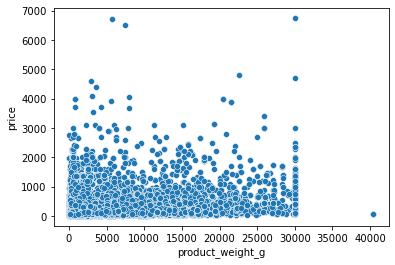

In [39]:
sns.scatterplot(data = order, x = 'product_weight_g', y = 'price')

To handle with the columns that have missing values, several actions can be taken such as delete the columns, delete the rows or normalize it with median/mean. Considering that the percentage of the missing values are low, I suppose that delete the rows will be fine

In [40]:
order = order[~order['order_time_days'].isnull()].reset_index(drop=True)

We can also check that after deleting null values of order time days, there are still few null values in product category name (english), review score, etc

In [41]:
order.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 115722 entries, 0 to 115721
Data columns (total 15 columns):
 #   Column                         Non-Null Count   Dtype  
---  ------                         --------------   -----  
 0   order_id                       115722 non-null  object 
 1   customer_id                    115722 non-null  object 
 2   order_status                   115722 non-null  object 
 3   review_score                   114861 non-null  float64
 4   order_time_days                115722 non-null  float64
 5   payment_type                   115719 non-null  object 
 6   payment_installments           115719 non-null  float64
 7   product_id                     115722 non-null  object 
 8   seller_id                      115722 non-null  object 
 9   price                          115722 non-null  float64
 10  freight_value                  115722 non-null  float64
 11  customer_city                  115722 non-null  object 
 12  seller_city                   

In [42]:
order[order['product_category_name_english'].isnull()].head()

,order_id,customer_id,order_status,review_score,order_time_days,payment_type,payment_installments,product_id,seller_id,price,freight_value,customer_city,seller_city,product_weight_g,product_category_name_english
126,bfe42c22ecbf90bc9f35cf591270b6a7,803ac05904124294f8767894d6da532b,delivered,5.0,12.0,credit_card,1.0,71225f49be70df4297892f6a5fa62171,e5a3438891c0bfdb9394643f95273d8e,27.30,15.10,bonfinopolis de minas,limeira,200.0,NaN
215,58ac1947c1a9067b9f416cba6d844a3f,ee8e1d37f563ecc11cc4dcb4dfd794c2,delivered,5.0,8.0,credit_card,5.0,9820e04e332fc450d6fd975befc1bc28,520b493b57809f446cb0a233bb3e25c7,110.00,14.16,sao paulo,santos,10800.0,NaN
268,e22b71f6e4a481445ec4527cb4c405f7,1faf89c8f142db3fca6cf314c51a37b6,delivered,4.0,10.0,credit_card,3.0,3bc5164bc7f4be77002d6651da65c98c,6cd68b3ed6d59aaa9fece558ad360c0a,22.50,11.74,itapagipe,belo horizonte,550.0,NaN
309,a094215e786240fcfefb83d18036a1cd,86acfb656743da0c113d176832c9d535,delivered,5.0,10.0,credit_card,1.0,5a848e4ab52fd5445cdc07aab1c40e48,c826c40d7b19f62a09e2d7c5e7295ee2,122.99,9.06,americana,guarulhos,400.0,NaN
381,6f841dde94727854eaff3f66432c80ea,a9c9532060c9d245f06526c633d2dfba,delivered,4.0,24.0,credit_card,3.0,c600d7f13104e8db2ca2b9fa78581409,f18112da765e0971ca5d510dec322bdd,168.90,24.05,volta redonda,brusque,2400.0,NaN


Now, we try to delete the null values of product category name (english)

In [43]:
order = order[~order['product_category_name_english'].isnull()].reset_index(drop=True)

In [44]:
order.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 114061 entries, 0 to 114060
Data columns (total 15 columns):
 #   Column                         Non-Null Count   Dtype  
---  ------                         --------------   -----  
 0   order_id                       114061 non-null  object 
 1   customer_id                    114061 non-null  object 
 2   order_status                   114061 non-null  object 
 3   review_score                   113212 non-null  float64
 4   order_time_days                114061 non-null  float64
 5   payment_type                   114058 non-null  object 
 6   payment_installments           114058 non-null  float64
 7   product_id                     114061 non-null  object 
 8   seller_id                      114061 non-null  object 
 9   price                          114061 non-null  float64
 10  freight_value                  114061 non-null  float64
 11  customer_city                  114061 non-null  object 
 12  seller_city                   

In [45]:
order = order[~order['review_score'].isnull()].reset_index(drop=True)

In [46]:
order.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 113212 entries, 0 to 113211
Data columns (total 15 columns):
 #   Column                         Non-Null Count   Dtype  
---  ------                         --------------   -----  
 0   order_id                       113212 non-null  object 
 1   customer_id                    113212 non-null  object 
 2   order_status                   113212 non-null  object 
 3   review_score                   113212 non-null  float64
 4   order_time_days                113212 non-null  float64
 5   payment_type                   113209 non-null  object 
 6   payment_installments           113209 non-null  float64
 7   product_id                     113212 non-null  object 
 8   seller_id                      113212 non-null  object 
 9   price                          113212 non-null  float64
 10  freight_value                  113212 non-null  float64
 11  customer_city                  113212 non-null  object 
 12  seller_city                   

The same row deletion of null values is done to the rest column that is still containing null values

In [47]:
order = order[~order['payment_type'].isnull()].reset_index(drop=True)

In [48]:
order = order[~order['product_weight_g'].isnull()].reset_index(drop=True)

Now, there are no missing values left and we can proceed to the next step which is Exploratory Data Analysis (EDA) to gain insights about the dataset

In [49]:
order.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 113208 entries, 0 to 113207
Data columns (total 15 columns):
 #   Column                         Non-Null Count   Dtype  
---  ------                         --------------   -----  
 0   order_id                       113208 non-null  object 
 1   customer_id                    113208 non-null  object 
 2   order_status                   113208 non-null  object 
 3   review_score                   113208 non-null  float64
 4   order_time_days                113208 non-null  float64
 5   payment_type                   113208 non-null  object 
 6   payment_installments           113208 non-null  float64
 7   product_id                     113208 non-null  object 
 8   seller_id                      113208 non-null  object 
 9   price                          113208 non-null  float64
 10  freight_value                  113208 non-null  float64
 11  customer_city                  113208 non-null  object 
 12  seller_city                   

### Exploratory Data Analysis (EDA)

Questions are asked first before EDA is done so that it will be more effective
1. Does the order time (order made until order delivered to customer) affect the given review score?
2. What payment type does the customer tend to use? Does customer tend to make longer payment installments with the higher price product?
3. Does product weight highly correlated with price and freight value?
4. What is the five product categories that receive the highest review score?
5. What is the majority of the customer city and seller city?

Analysis no 1

<AxesSubplot:xlabel='review_score', ylabel='count'>

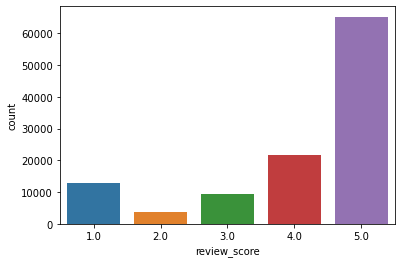

In [50]:
sns.countplot(data = order, x = 'review_score')

In [51]:
order.groupby(['review_score']).agg({'order_time_days':'mean'})

,order_time_days
review_score,
1.0,19.139759
2.0,15.301302
3.0,13.565974
4.0,11.780345
5.0,10.199883


So, the answer is yes. Order time affects the review score given by the customer. The faster the order arrives, the better the review score.

Analysis no 2

In [52]:
order.groupby(['payment_type']).agg({'order_id':'count'})

,order_id
payment_type,
boleto,22029
credit_card,83535
debit_card,1622
voucher,6022


Customers tend to use credit card, boleto, voucher and debit card as their payment respectively

In [53]:
np.corrcoef(order['payment_installments'], order['price'])

array([[1.        , 0.27976307],
       [0.27976307, 1.        ]])

The correlation is low (<0.5) so it means customers don't tend to make longer payment installments with higher price. This probably happens due to the reason that the product price is not too pricy/expensive.

Analysis no 3

In [54]:
np.corrcoef(order['product_weight_g'], order['price'])

array([[1.       , 0.3414005],
       [0.3414005, 1.       ]])

In [55]:
np.corrcoef(order['product_weight_g'], order['freight_value'])

array([[1.        , 0.61183941],
       [0.61183941, 1.        ]])

Product weight is not correlated to the price but it is highly correlated to freight value. This probably happens due to the reason that weight is usually highly considered in calculating the shipping/freight value of a package.

Analysis no 4

In [56]:
a = order.groupby(['product_category_name_english']).agg({'review_score':'mean'})
a = a.sort_values('review_score', ascending = False).head(5)
a

,review_score
product_category_name_english,
fashion_childrens_clothes,5.000000
cds_dvds_musicals,4.642857
books_imported,4.525424
books_general_interest,4.501838
small_appliances_home_oven_and_coffee,4.453333


The top 5 product categories that receive the highest review score are fashion children clothes, cds & dvds musicals, imported books, books of general interest and small appliances (home, oven, coffee) respectively

Analysis no 5

In [57]:
b = order.groupby(['customer_city']).agg({'order_id':'count'})
b = b.sort_values('order_id', ascending = False).head(5)
b

,order_id
customer_city,
sao paulo,17872
rio de janeiro,7787
belo horizonte,3140
brasilia,2382
curitiba,1767


In [58]:
c = order.groupby(['seller_city']).agg({'order_id':'count'})
c = c.sort_values('order_id', ascending = False).head(5)
c

,order_id
seller_city,
sao paulo,28210
ibitinga,8101
curitiba,3057
santo andre,3054
sao jose do rio preto,2633


Sao Paolo is the majority city of both seller city and customer city